# Random Forest
**Random Forest** is an ensemble of Decision Trees. With a few exceptions. A RandomForestClassifier has all the hyperparameters of:
  * **DecisionTreeClassifier** (to control how trees are grown).
  * **BaggingClassifier** to control the ensemble itself.

The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. 

![Capture_rf](https://user-images.githubusercontent.com/67468718/106399014-1498c800-63cb-11eb-8d32-ed42b8bcf569.JPG)

## Objective



The following BaggingClassifier is roughly equivalent to the previous RandomForestClassifier. **So let's visualize a single estimator from a random forest model, using the Iris dataset to classify the data into the appropriate species.**

## Sourcing and loading

### Import Packages

In [4]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call

### Load Data

In [6]:
iris = load_iris()

### Modeling

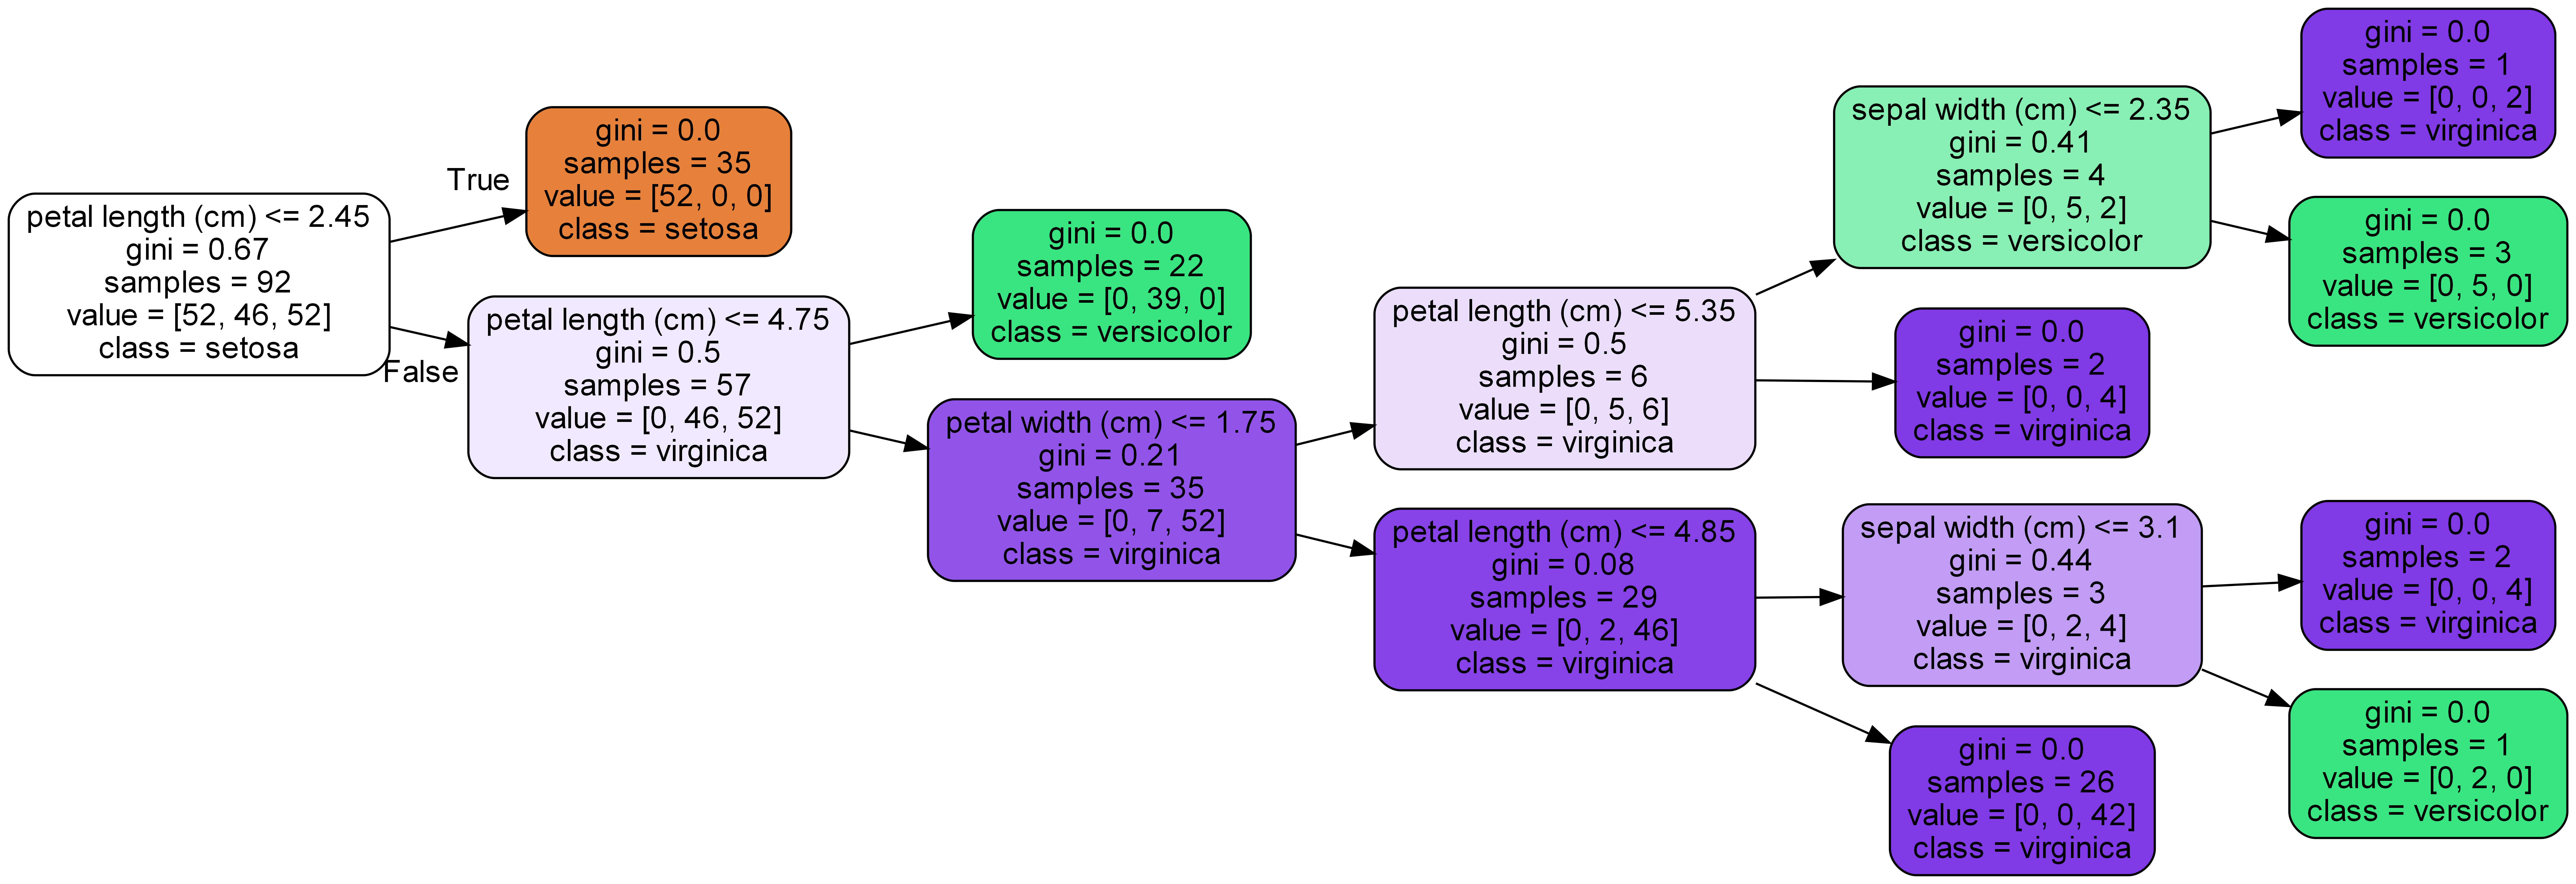

In [7]:
# Model (can also use single decision tree)
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', rotate =True,
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

### Single estimator from a random forest model Summary:

  1. Notice how each split seperates the data into buckets of similar observations. This is a single tree and a relatively simple classification dataset, but the same method is used in a more complex dataset with greater depth to the trees.
  2. As shown above, we have 7 leaves with purity at 0 (This is the ideal scenario), however 5 of them are having a very low number of samples so we cannot be very confident for their predictions (clear sign of over-fitting).
  3. Decision Tree Criterion used is Gini:
   * Calculation of Entropy and Gini methods behave in the same way but entropy involves a log computation and Gini impurity involved a square computation. Since computing square is cheaper than logarithmic function we prefer Gini impurity over entropy.


In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))